Imports and Initializations

In [18]:
!cd
!C:\EnergyPlusV9-6-0\EnergyPlus -v
!C:\EnergyPlusV9-6-0\EnergyPlus -h
import os
import opyplus as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import pandas as pd
eplus_dir_path = op.get_eplus_base_dir_path((9, 6, 0))

C:\Users\chmat\Desktop\THESIS
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.07 16:36
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.07 16:36
PythonLinkage: Linked to Python Version: "3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]"
Built on Platform: Windows_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -D, --design-day             Force design-day-only simulation
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
                   

 Running EP Baseline Simulation

In [19]:
idf_path = "C:\\Users\\chmat\\Documents\\GenOpt\\2\\backup\\REFBLDG2.expidf"
epw_path = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")

PricePerKwh = pd.read_excel (r'C:\\Users\\chmat\\Desktop\\THESIS\\Optimization Files\\TimeofDayPricing - Copy.xlsx')
print(idf_path)

In [21]:
# # run simulation
s = op.simulate(idf_path, epw_path, "Baseline")
print(f"status: {s.get_status()}\n")
#print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (Baseline)


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.07 16:36,
   ** Warning ** Output:PreprocessorMessage="GroundTempCalc - Slab" has the following Warning condition:
   **   ~~~   ** Slab thickness [0.100 m] reset to 0.122 m  for computational stability.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** CalculateZoneVolume: 1 zone is not fully enclosed. For more details use:  Output:Diagnostics,DisplayExtrawarnings; 
   ** Warning ** CheckUsedConstructions: There are 13 nominally unused constructions in input.
   **   ~~~   ** For explicit details on each unused construction, use Output:Diagnostics,DisplayExtraWarnings;
   ** Warning ** GetAirflowNetworkInput: AirflowNetwork:SimulationControl object, 
   **   ~~~   ** ..Specified AirflowNetwork Control = "MultizoneWithDistribution" and ZoneVentilation:* objects are present.
   **   ~~~   ** ..ZoneVentilation objects will not be simulated.
   ************* Beginning Sy

In [22]:
# eso = s.get_out_eso()
# print(eso.get_info())

In [23]:
# # retrieve hourly output (.eso file)
# hourly_output = s.get_out_eso()
# # get Pandas dataframe
# #df = hourly_output.get_data('denver-aurora-buckley.afb_co_usa ann htg 99.6% condns db')
# df = hourly_output.get_data('run period')

In [26]:
df = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\2\\backup\\REFBLDG2.csv')

In [27]:
df2 = df[48:72]
df2

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly),ATTIC_UNIT1:Zone Mean Air Temperature [C](Hourly),LIVING_UNIT1:Zone Air Temperature [C](Hourly),LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly),ATTIC_UNIT1:Zone Air Temperature [C](Hourly),ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly),Heating:NaturalGas [J](Hourly)
48,01/01 01:00:00,-4.500,21.499129,-1.650441,21.499129,21.5,-1.650441,0.0,1.949696e+07
49,01/01 02:00:00,-3.000,21.497829,0.384162,21.497829,21.5,0.384162,0.0,1.783906e+07
50,01/01 03:00:00,-3.625,21.497464,0.361536,21.497464,21.5,0.361536,0.0,1.880195e+07
51,01/01 04:00:00,-2.750,21.498036,0.735852,21.498036,21.5,0.735852,0.0,1.848171e+07
52,01/01 05:00:00,-2.000,21.498114,0.587083,21.498114,21.5,0.587083,0.0,1.849260e+07
53,01/01 06:00:00,-1.375,21.499163,2.141985,21.499163,21.5,2.141985,0.0,1.712422e+07
54,01/01 07:00:00,-1.000,21.498793,2.626143,21.498793,21.5,2.626143,0.0,1.612842e+07
55,01/01 08:00:00,-1.000,21.498287,2.064689,21.498287,21.5,2.064689,0.0,1.442531e+07
56,01/01 09:00:00,-0.375,21.498631,3.574356,21.498631,21.5,3.574356,0.0,9.568726e+06
57,01/01 10:00:00,1.250,21.498530,4.732231,21.498530,21.5,4.732231,0.0,9.621157e+06


In [28]:
df2.keys()

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Mean Air Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Air Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Air Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'Heating:NaturalGas [J](Hourly) '],
      dtype='object')

In [29]:
#print((df['bgwall_upper_ldf,Surface Outside Face Convection Heat Transfer Coefficient'][1:48]))
#print(df['environment,Site Outdoor Air Drybulb Temperature'][0:23])

In [30]:
##Zone Temperature ###

ZoneT = df2[["LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT = df2["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating = df2["Heating:NaturalGas [J](Hourly) "]
Setpoint = df2["LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]
#Notmet = sum (df["living_unit1,Zone Heating Setpoint Not Met While Occupied Time"])
#PeopleE= df['living_unit1,Zone People Total Heating Energy']
# monthly resample and display
# print(df[[
#     "living_unit1,Zone Mean Air Temperature",
# ]])
print(Heating)

48    1.949696e+07
49    1.783906e+07
50    1.880195e+07
51    1.848171e+07
52    1.849260e+07
53    1.712422e+07
54    1.612842e+07
55    1.442531e+07
56    9.568726e+06
57    9.621157e+06
58    5.268001e+06
59    6.958746e+06
60    7.736872e+06
61    8.968315e+06
62    1.159614e+07
63    1.153846e+07
64    1.086007e+07
65    1.212972e+07
66    1.240955e+07
67    1.602195e+07
68    1.711269e+07
69    1.662621e+07
70    2.070254e+07
71    2.440320e+07
Name: Heating:NaturalGas [J](Hourly) , dtype: float64


In [31]:
hours =24

In [32]:
print( str(sum (Heating[0:hours]/1000000000)) + 'GJ')
print( str(sum (Heating[0:hours]/3.6e6)) + 'kWh')

0.342312582567296GJ
95.08682849091556kWh


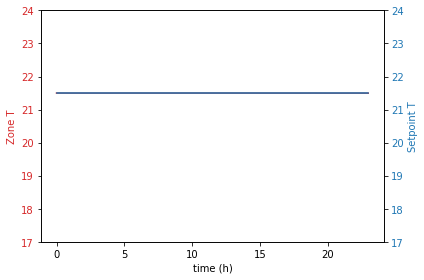

In [33]:
# Create som mock data
t = np.arange(0, hours, 1)
data1 = ZoneT[0:hours]
data2 = Setpoint[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


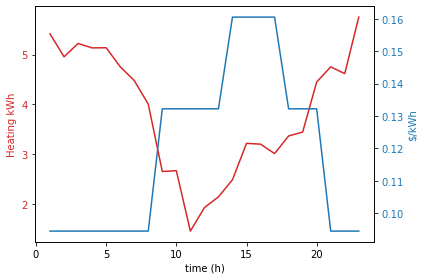

In [34]:
# Create some mock data
t = np.arange(1, hours, 1)
data1 = Heating[0:hours-1]/3.6E6 ##J to kWh
data2 = PricePerKwh[0:hours-1]*3.4E6

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [108]:
### Total Price for Time Period
## 0.027 per kwH
ppkwh= 0.02696
# TotPrice = np.vdot(PricePerKwh[1:hours], Heating[1:hours])
PriceArray = ppkwh *Heating[1:hours]/3.6E6
TotPrice= sum(PriceArray)+ 16.20/31
print(TotPrice)
#print(FactorE)

2.940110957578511


In [103]:
idf_path2 = 'C:\\Users\\chmat\\Documents\\GenOpt\\2\\output\\output.expidf'
epw_path2 = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")


In [42]:
print(idf_path2)

C:\Users\chmat\Documents\GenOpt\2\output\output.expidf


In [47]:
# # run simulation
s2 = op.simulate(idf_path2, epw_path2, "Optimized")
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (Optimized)


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.07 16:36,
   ** Warning ** Output:PreprocessorMessage="GroundTempCalc - Slab" has the following Warning condition:
   **   ~~~   ** Slab thickness [0.100 m] reset to 0.122 m  for computational stability.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** CalculateZoneVolume: 1 zone is not fully enclosed. For more details use:  Output:Diagnostics,DisplayExtrawarnings; 
   ** Warning ** CheckUsedConstructions: There are 13 nominally unused constructions in input.
   **   ~~~   ** For explicit details on each unused construction, use Output:Diagnostics,DisplayExtraWarnings;
   ** Warning ** GetAirflowNetworkInput: AirflowNetwork:SimulationControl object, 
   **   ~~~   ** ..Specified AirflowNetwork Control = "MultizoneWithDistribution" and ZoneVentilation:* objects are present.
   **   ~~~   ** ..ZoneVentilation objects will not be simulated.
   ************* Beginning Sy

In [134]:
opt_df = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\2\\output\\output.csv')
opt_df = opt_df[48:72]
keys = opt_df.keys()

In [135]:
keys

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Mean Air Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'Heating:Electricity [J](Hourly) '],
      dtype='object')

In [136]:
opt_df

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly),ATTIC_UNIT1:Zone Mean Air Temperature [C](Hourly),LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly),ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly),Heating:Electricity [J](Hourly)
48,01/01 01:00:00,-4.666667,18.873632,-2.591696,18.875,0.0,1.187312e+07
49,01/01 02:00:00,-3.000000,19.247067,-0.517826,19.250,0.0,1.050447e+07
50,01/01 03:00:00,-3.583333,19.006331,-0.604733,19.000,0.0,9.167080e+06
51,01/01 04:00:00,-2.833333,18.502563,-0.545161,18.500,0.0,7.013226e+06
52,01/01 05:00:00,-2.000000,18.500202,-0.255425,18.500,0.0,7.732109e+06
53,01/01 06:00:00,-1.416667,18.500203,0.902889,18.500,0.0,7.457434e+06
54,01/01 07:00:00,-1.000000,18.002342,1.236858,18.000,0.0,7.649112e+06
55,01/01 08:00:00,-1.000000,18.495712,1.163695,18.500,0.0,1.019295e+07
56,01/01 09:00:00,-0.416667,18.500015,2.411156,18.500,0.0,6.261697e+06
57,01/01 10:00:00,1.166667,18.501968,3.319631,18.500,0.0,4.518006e+06


In [137]:
##Zone Temperature ###
ZoneT2 = opt_df[['LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)']]
OutsideT2 = opt_df[keys[1]]
Heating2 = opt_df[['Heating:Electricity [J](Hourly) ']]
Setpoint2 = opt_df[['LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)']]

# monthly resample and display
# print(df[[
#     "living_unit1,Zone Mean Air Temperature",
# ]])

In [138]:
sum(Heating2)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

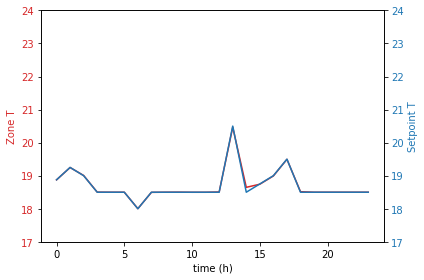

In [77]:
# Create som mock data
hours = 24
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


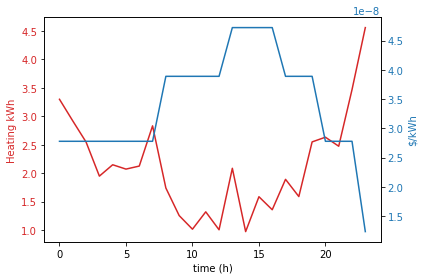

In [109]:
# Create some mock data
t = np.arange(0, hours, 1)
data1 = Heating2[0:hours]/3.6e6
data2 = PricePerKwh[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [119]:
TotPrice2 = np.vdot(PricePerKwh[1:hours], Heating2[1:hours]/3.6E6)
print("MINIMUM PRICE $ " + str(TotPrice2))
print("BASELINE PRICE $ " + str(TotPrice))


MINIMUM PRICE $ 1.5194810887845272e-06
BASELINE PRICE $ 2.940110957578511


In [111]:
#Energy Comparison
print (sum(Heating[0:hours])/3.6e6)
print (sum(Heating2[0:hours])/3.6e6)

95.08682849091558


TypeError: unsupported operand type(s) for +: 'int' and 'str'

# RATING ANOTHER SCHEDULE

In [151]:
#Schedule Rating
MaxP = TotPrice
MinP = TotPrice2
DayPrice = 1.2
PriceRating = (1-(DayPrice-MinP)/(MaxP-MinP))*5
if (PriceRating > 5):
    PriceRating=5
    
print(PriceRating)

##Comfort Rating
## Preffered point not met while occupied 
PrefT = 21
count =0

for i in range (23):
    T = ZoneT2['living_unit1,Zone Mean Air Temperature'][i]
    if (i <7 or i>17):
        if ((T-PrefT)> 1.25):
            count = count+1
print(count)  

TRating = (1-(count/24))*5
if (TRating > 5):
    TRating=5
    
print(TRating)

4.642317879508776
0
5.0


In [153]:
Rating = 0.5*PriceRating + 0.5*TRating
print('RATING:' +str(Rating))

RATING:4.821158939754389


TEST BELOW

Add Constraints

In [ ]:
# s = op.simulate(idf_path, epw_path, "Baseline")
# print(f"status: {s.get_status()}\n")
# print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

ZoneT = df[["living_unit1,Zone Mean Air Temperature"]][1:hours]
Heating = df["heating:electricity,Meter"][1:hours]
print(ZoneT['living_unit1,Zone Mean Air Temperature'][9])

In [ ]:
model.addConstrs((ZoneT['living_unit1,Zone Mean Air Temperature'][i] <= 24.0 for i in range(hours)), name='T_max')
model.addConstrs((ZoneT['living_unit1,Zone Mean Air Temperature'][i] >= 18.0 for i in range(hours)), name='T_min')

##Maybe the setpoint can be higher... as long as the actual temperature is within comfort

In [ ]:

Cost = PricePerKwh.values.flatten()
a = Cost[0:hours]
A = sp.diags(a)

In [ ]:


# Solve
model.optimize()
printSolution()


In [ ]:
 # plotting the points
Opt_T = model.printAttr('T_Setpoints')
t = np.arange(1, hours, 1)
print(Opt_T[1])
# plt.plot(t,t)

In [ ]:
##Convert J to kWh
Heating = Heating / 3.6E6

In [ ]:
# Create some mock data
t = np.arange(1, 24*30, 1)
data1 = Heating[1:24*30]
data2 = ZoneT[1:24*30]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating Elec (Kwh)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ZoneT', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
## Just January to Test ####
## Elec Heating
plt.plot(ZoneT[1:24*60])
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Heating Electricity (kWh)')
 
# giving a title to my graph
plt.title('Zone Temperature')